In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import csv

#DATA_FOLDER = '/content/gdrive/My Drive/101/results/logreg/'

subfolders = []
for a in range(1,7):
    for b in range(6,0,-1):
        subfolders.append('+1e-0'+str(a)+'_+1e-0'+str(b)+'_+')

subfolders = np.asarray(subfolders).reshape(6,-1)


DATA_FOLDER = '/content/gdrive/My Drive/101/results 102/logreg/'

results = {}
alpha_beta_loss = np.zeros((6,6,3))
gamma = ['1e-01', '1e-02', '1e-03', '1e-04']
for g in gamma:
    for i in range(6):
        for j in range(6):
            file = DATA_FOLDER + subfolders[i,j] + g + '/sgd_hd.csv'
            with open(file, 'r') as f:
                last_line = list(csv.reader(f))[-1]
                a_b = last_line[7:10:2] #alpha, beta
                loss = last_line[4] #loss
                alpha_beta_loss[i,j,0] = np.round(float(a_b[0]),6)
                alpha_beta_loss[i,j,1] = np.round(float(a_b[1]),6)
                alpha_beta_loss[i,j,2] = np.round(float(loss),6)
    results[g] = alpha_beta_loss
    alpha_beta_loss = np.zeros((6,6,3))


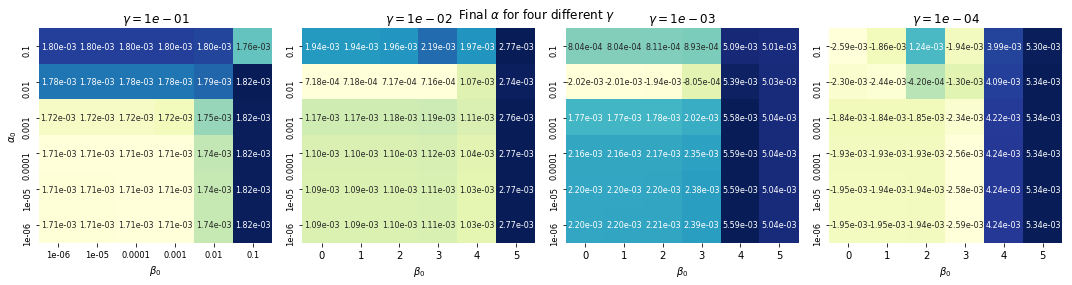

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(1,4, figsize=(15,4))
f.suptitle(r'Final $\alpha$ for four different $\gamma$')
for i in range(4):
    ax[i].set_title(r'$\gamma = {:s}$'.format(gamma[i]))
    f = sns.heatmap(results[gamma[i]][:,:,0], annot=True ,cmap="YlGnBu",cbar=False, ax=ax[i], fmt='.2e', annot_kws={'size':8})
    f.set_yticklabels([1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6],fontsize='small')
    f.set_xlabel(r'$\beta_0$')
    if i==0:
        f.set_xticklabels([1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],fontsize='small')
        f.set_ylabel(r'$\alpha_0$')
plt.tight_layout()
plt.show()

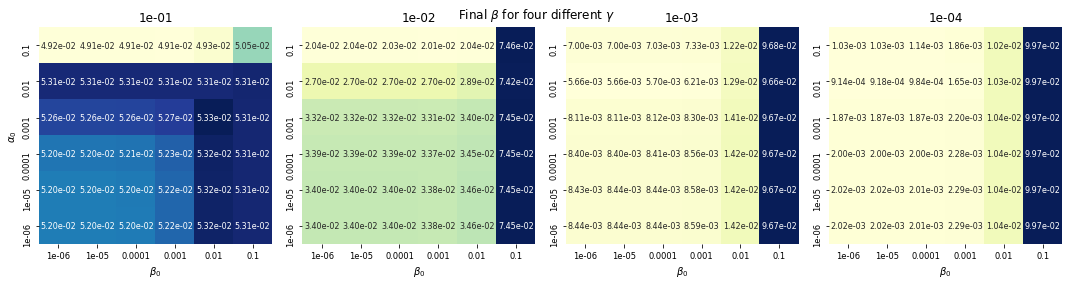

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(1,4, figsize=(15,4))
f.suptitle(r'Final $\beta$ for four different $\gamma$')
for i in range(4):
    ax[i].set_title(gamma[i])
    f = sns.heatmap(results[gamma[i]][:,:,1], annot=True ,cmap="YlGnBu",cbar=False, ax=ax[i], fmt='.2e', annot_kws={'size':8})
    f.set_xticklabels([1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],fontsize='small')
    f.set_yticklabels([1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6],fontsize='small')
    f.set_xlabel(r'$\beta_0$')
    if i==0:
        f.set_xticklabels([1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],fontsize='small')
        f.set_ylabel(r'$\alpha_0$')
plt.tight_layout()
plt.show()

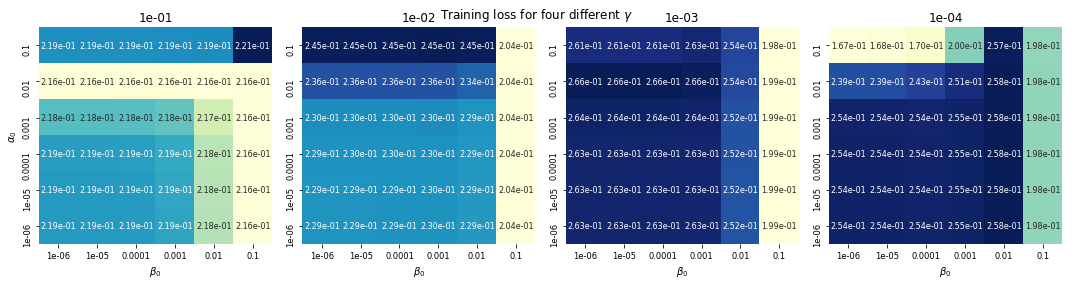

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(1,4, figsize=(15,4))
f.suptitle(r'Training loss for four different $\gamma$')
for i in range(4):
    ax[i].set_title(gamma[i])
    f = sns.heatmap(results[gamma[i]][:,:,2], annot=True ,cmap="YlGnBu",cbar=False, ax=ax[i], fmt='.2e', annot_kws={'size':8})
    f.set_xticklabels([1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],fontsize='small')
    f.set_yticklabels([1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6],fontsize='small')
    f.set_xlabel(r'$\beta_0$')
    if i==0:
        f.set_xticklabels([1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],fontsize='small')
        f.set_ylabel(r'$\alpha_0$')
plt.tight_layout()
plt.show()